# Class importance using Fuzzy Cognitive Maps

Fuzzy Cognitive maps can be used for classification tasks. One of the big benefits of them is, that they can be explained more easily than neural networks for example.
Based on the python package `fmcpy` and their example presented in their [paper](https://arxiv.org/pdf/2111.12749) we will go through one case, to get a better idea of how it works. We will take a look at the class importance.

### Long-Term Cognitive Networks (LTCN-MP)

In the image below there is a visualization from the above mentioned paper. The graph consists of:
* input signal: x1, x2, x3
* inner layer: c1, c2, c3
* outer layer: c4, c5, c6
* output layer: y1, y2, y3

The weights between the nodes of the inner layer are computet with the least square problem (unsupervised) and the weights between the inner and outer layer with the Moore-Penrose-Inverse.

![LTCN_MP Visualization](image/LTCN_MP_Paper.png)

Here we load the necessary packages and functions.

In [1]:
import fcmpy.ml.classification.FCM_MP as mp
import matplotlib.pylab as plt

## Input format

When working with the `fcmpy` package, it is necessary to use the **.arff** format and that the values are normalized.

In [4]:
sources = ["data/irisnorm.arff"]

In [5]:
params = {"sources":sources}

As you may have experienced before, the well-known iris dataset lends itself for first examples and getting a feeling for a new approach or algorithm. If you haven't come across the dataset here a short description of it:

The official title is **Iris Plants Database**. It was created by R.A. Fisher (Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov) in July, 1988. The dataset consists of five columns. Those are:

**Features:**
* sepal length in cm
* sepal width in cm
* petal length in cm
* petal width in cm

**Target Class:**
* class: 
    * Iris Setosa
    * Iris Versicolour
    * Iris Virginica



The packages allows us to change different parameter setting, which will effect the performance of the model.

- **L (int, default=0)**: Used in reasoning rule 3 to determine temporal dependencies.
- **M (int, default=1)**: Number of output variables in the dataset.
- **T (int, default=None)**: Number of iterations in the FCM model; if not set, defaults to `features - output variables`.
- **b1 (float, default=1.0)**: Weighting parameter used in reasoning rules to control activation function blending.
- **folds (int, default=10)**: Number of folds used in Stratified K-Fold cross-validation.
- **output (str, default='./output.csv')**: File path for saving results in CSV format.
- **rule (int, choices=[0, 1, 2], default=0)**: Selection of reasoning rule:
  - `0`: Standard logit function.
  - `1`: Weighted combination of logit and previous output.
  - `2`: Weighted combination including self-feedback.
- **verbose (bool, default=False)**: If `True`, enables detailed output logging during training.

**Activation Function Parameters** (`p` List)

- **p[0] (float, default=1.0)**: Slope parameter for the activation function.
- **p[1] (float, default=1.0)**: Offset (`h`) used for activation scaling.
- **p[2] (float, default=1.0)**: `q` parameter, controlling curve steepness.
- **p[3] (float, default=1.0)**: `v` parameter, adjusting function shape.



The output of the LTCN-MP is numeric and the implementation uses the Mean Squared Error (MSE) to update the weights.

In [6]:
out = mp.run(**params)

Processing data/irisnorm.arff
{'b1': '1.00', 'L': 0, 'slope': '1.00', 'h': '1.00', 'train_error': 0.16132028857687228, 'test_error': 0.16131848791992734, 'training_time': 0.0009889999999999999, 'weights': array([[ 0.87938423, -0.05353946,  1.        ],
       [-0.08401702,  0.87938423, -0.57062046],
       [ 0.58553814, -0.21291645,  0.87938423]]), 'importance': array([[ 1.        ],
       [-0.38801166],
       [-0.7000843 ]])}
MSE Average of the model across the 1 datasets: 0.1613


In [7]:
out[0]["weights"]

array([[ 0.87938423, -0.05353946,  1.        ],
       [-0.08401702,  0.87938423, -0.57062046],
       [ 0.58553814, -0.21291645,  0.87938423]])

The weight matrix (W) represents the relationships (causal influence) between concepts in the Fuzzy Cognitive Map (FCM).

<BarContainer object of 3 artists>

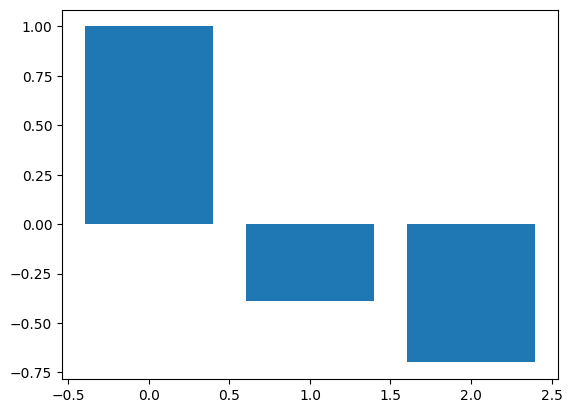

In [8]:
# feature importance for classification purposes
fig, ax = plt.subplots()
ax.bar(range(len(out[0]["importance"].flatten())),
height=out[0]["importance"].flatten())

## Class Importance in Model Predictions

Each value represents how strongly the model relies on each class when making a prediction:

**1.0 (Iris Setosa)**
* This means that **Iris Setosa** has the strongest positive influence in classification.
* If the input strongly resembles Setosa, the model is very confident in classifying it correctly.

**-0.388 (Iris Versicolor)**
* A negative importance suggests that **Versicolor** competes with Setosa and Virginica.
* If an input is classified as Versicolor, it reduces the confidence in other classes.

**-0.700 (Iris Virginica)**
* The most negative value means **Virginica** suppresses other class predictions the most.
* When an instance strongly resembles Virginica, the model lowers the probability of it being Setosa or Versicolor.